In [1]:
#Github Link: https://github.com/muhammadusman001/ML-Titanic-Analysis 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [4]:
# Data preprocessing
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df.dropna(inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [5]:
# Splitting data
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Model training
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [7]:
# Model evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))

Decision Tree Accuracy: 0.6993006993006993
Random Forest Accuracy: 0.7692307692307693

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        80
           1       0.76      0.70      0.73        63

    accuracy                           0.77       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143



In [8]:
# Define color-blind friendly palette
cb_palette = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

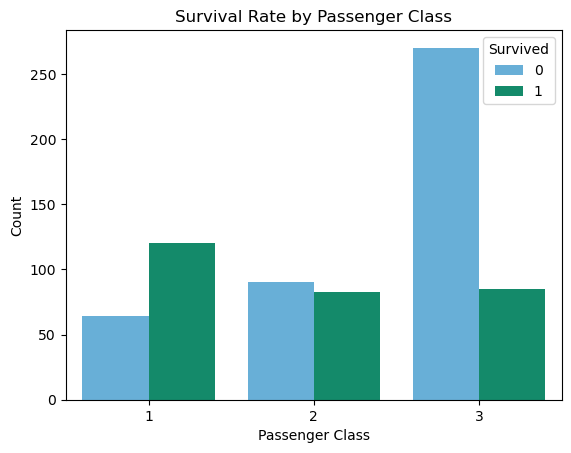

In [9]:
# Plot 1: Survival Rate by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df, palette=[cb_palette[1], cb_palette[2]])
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

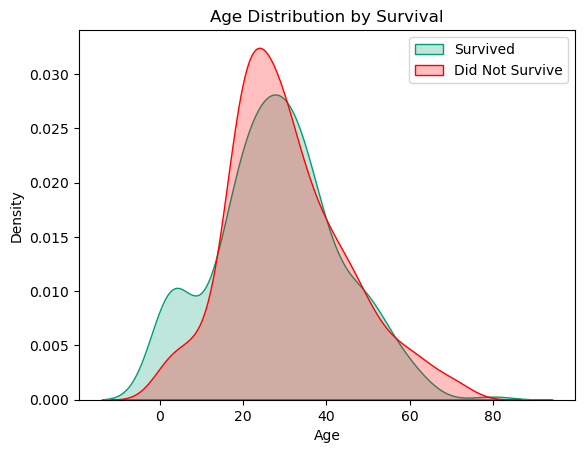

In [10]:
# Plot 2: Age Distribution by Survival
sns.kdeplot(df[df['Survived'] == 1]['Age'], label="Survived", fill=True, color=cb_palette[2])
sns.kdeplot(df[df['Survived'] == 0]['Age'], label="Did Not Survive", fill=True, color='red')
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

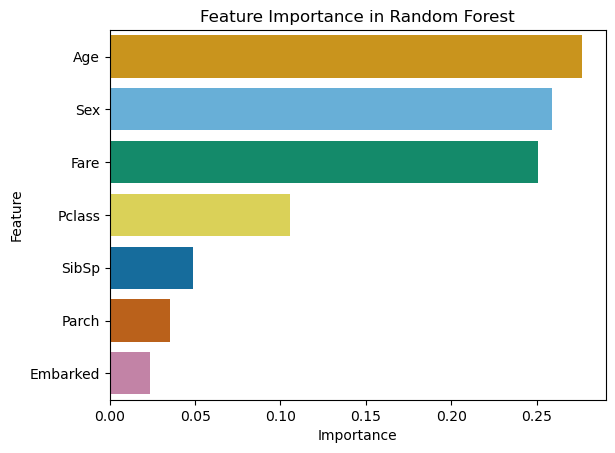

In [11]:
# Plot 3: Feature Importance from Random Forest
importances = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance_df, palette=cb_palette, legend=False)


plt.title("Feature Importance in Random Forest")
plt.show()

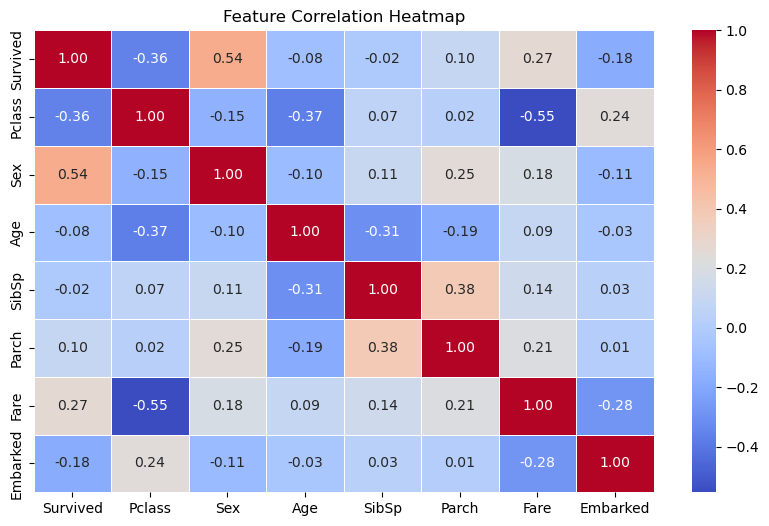

In [12]:
# Plot 4: Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()